# SatellitePhenology exact restart (ERS) test result comparison

This notebook visualizes the exact restart differences found when trying to update the filter loop structure that `SatellitePhenology` uses for FATES sp mode.  The original filter used for clm sp mode is `nolakep`.  The fates sp mode update uses `all_soil_patches` filter as of commit https://github.com/ESCOMP/CTSM/pull/1182/commits/1229615c040bea3c42638354681c73003128cde1 

## Import libraries

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import ctsm_py.fates_xarray_funcs as fx
import nc_time_axis

## Load history output data

In [20]:
# soilp
fn_soilp_base = 'ERS_Ld30.f45_f45_mg37.I2000Clm50FatesCru.cheyenne_intel.clm-FatesReducedComplexSatellitePhenology.spmode-nploop-charliefix-soilp.clm2.h0.2000-01-01-00000.nc.base'
fn_soilp_rest = 'ERS_Ld30.f45_f45_mg37.I2000Clm50FatesCru.cheyenne_intel.clm-FatesReducedComplexSatellitePhenology.spmode-nploop-charliefix-soilp.clm2.h0.2000-01-01-00000.nc.rest'

# all_soil_patches
fn_allsoil_base = 'ERS_Ld30.f45_f45_mg37.I2000Clm50FatesCru.cheyenne_intel.clm-FatesReducedComplexSatellitePhenology.spmode-nploop-charliefix-diag1.clm2.h0.2000-01-01-00000.nc.base'
fn_allsoil_rest = 'ERS_Ld30.f45_f45_mg37.I2000Clm50FatesCru.cheyenne_intel.clm-FatesReducedComplexSatellitePhenology.spmode-nploop-charliefix-diag1.clm2.h0.2000-01-01-00000.nc.rest'

# nolakep
fn_nolake_base = 'ERS_Ld30.f45_f45_mg37.I2000Clm50FatesCru.cheyenne_intel.clm-FatesReducedComplexSatellitePhenology.spmode-nonploop-charliefix-diag1.clm2.h0.2000-01-01-00000.nc.base'
fn_nolake_rest = 'ERS_Ld30.f45_f45_mg37.I2000Clm50FatesCru.cheyenne_intel.clm-FatesReducedComplexSatellitePhenology.spmode-nonploop-charliefix-diag1.clm2.h0.2000-01-01-00000.nc.rest'

data_sp_base = xr.open_dataset(fn_soilp_base)
data_sp_rest = xr.open_dataset(fn_soilp_rest)
data_as_base = xr.open_dataset(fn_allsoil_base)
data_as_rest = xr.open_dataset(fn_allsoil_rest)
data_nl_base = xr.open_dataset(fn_nolake_base)
data_nl_rest = xr.open_dataset(fn_nolake_rest)

## Plot the data

### TLAI

Variable diff calculations

In [21]:
tlai_sp_base = data_sp_base.TLAI
tlai_sp_rest = data_sp_rest.TLAI
tlai_sp_diff = tlai_sp_base - tlai_sp_rest

tlai_as_base = data_as_base.TLAI
tlai_as_rest = data_as_rest.TLAI
tlai_as_diff = tlai_as_base - tlai_as_rest

tlai_nl_base = data_nl_base.TLAI
tlai_nl_rest = data_nl_rest.TLAI
tlai_nl_diff = tlai_nl_base - tlai_nl_rest

tlai_spas_base_diff = tlai_sp_base - tlai_as_base
tlai_spas_rest_diff = tlai_sp_rest - tlai_as_rest

tlai_asnl_base_diff = tlai_as_base - tlai_nl_base
tlai_asnl_rest_diff = tlai_as_rest - tlai_nl_rest

tlai_spnl_base_diff = tlai_sp_base - tlai_nl_base
tlai_spnl_rest_diff = tlai_sp_rest - tlai_nl_rest

Plot new `all_soil_patches` loop base-rest difference

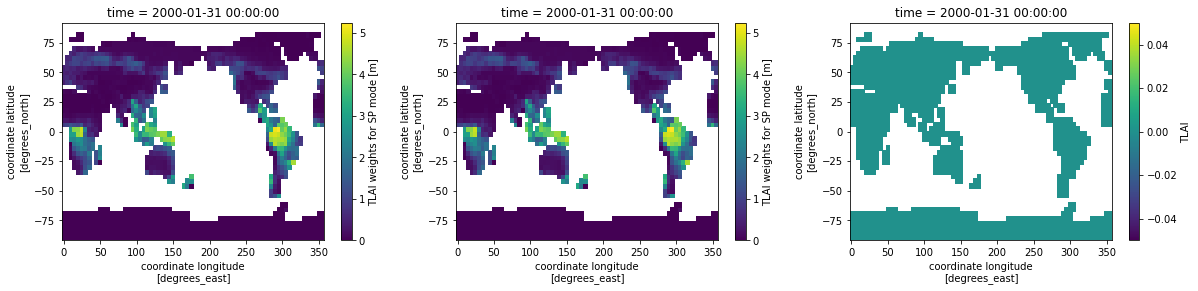

In [22]:
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_as_base.isel(time=tstop_idx).plot(ax=ax1)
tlai_as_rest.isel(time=tstop_idx).plot(ax=ax2)
tlai_as_diff.isel(time=tstop_idx).plot(ax=ax3)

Plot `nolakep` loop results

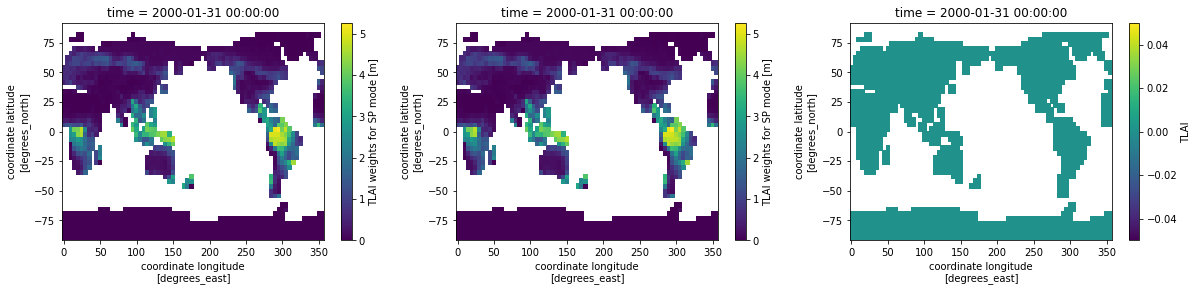

In [23]:
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_nl_base.isel(time=tstop_idx).plot(ax=ax1)
tlai_nl_rest.isel(time=tstop_idx).plot(ax=ax2)
tlai_nl_diff.isel(time=tstop_idx).plot(ax=ax3)

Plot `soilp` loop results

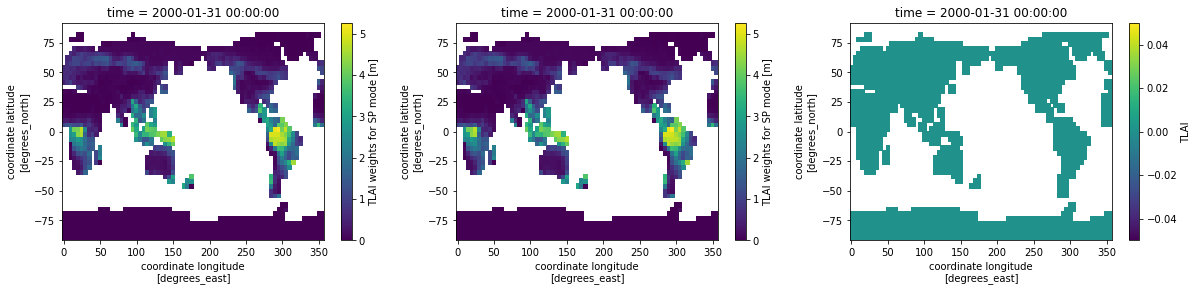

In [24]:
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_sp_base.isel(time=tstop_idx).plot(ax=ax1)
tlai_sp_rest.isel(time=tstop_idx).plot(ax=ax2)
tlai_sp_diff.isel(time=tstop_idx).plot(ax=ax3)

Compare the restarts between the `all_soil_patches` filter and the `nolakep` filter loop

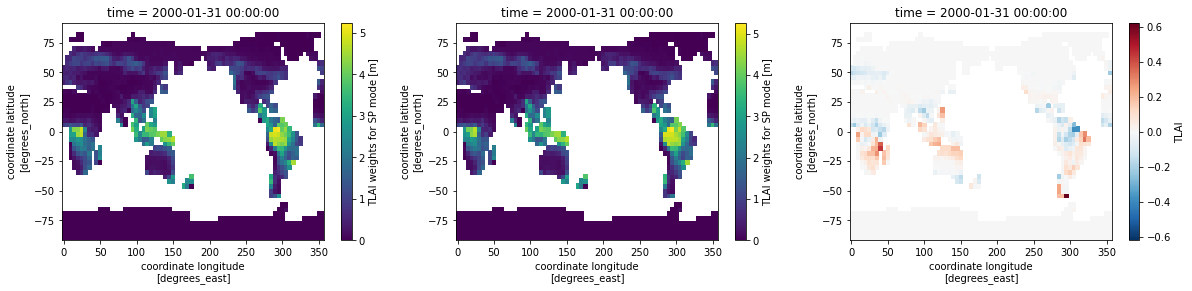

In [25]:
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_as_rest.isel(time=tstop_idx).plot(ax=ax1)
tlai_nl_rest.isel(time=tstop_idx).plot(ax=ax2)
tlai_asnl_rest_diff.isel(time=tstop_idx).plot(ax=ax3)

Compare the restarts between the `all_soil_patches` filter and the `soilp` filter loop

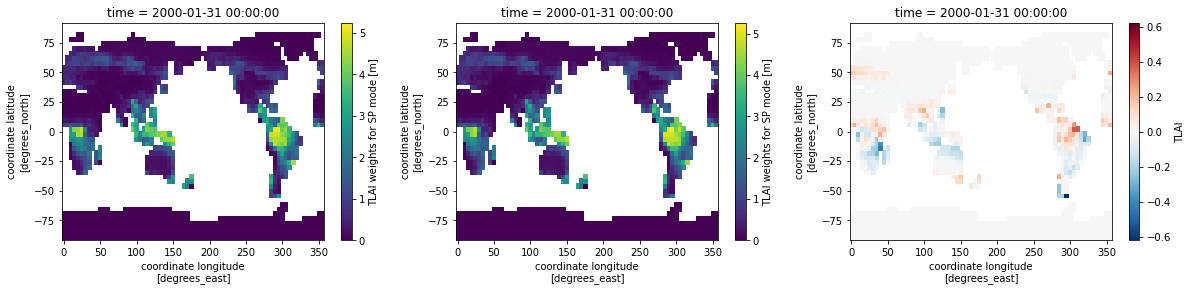

In [26]:
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_as_rest.isel(time=tstop_idx).plot(ax=ax1)
tlai_sp_rest.isel(time=tstop_idx).plot(ax=ax2)
tlai_spas_rest_diff.isel(time=tstop_idx).plot(ax=ax3)

Compare the restarts between the `nolakep` filter and the `soilp` filter loop

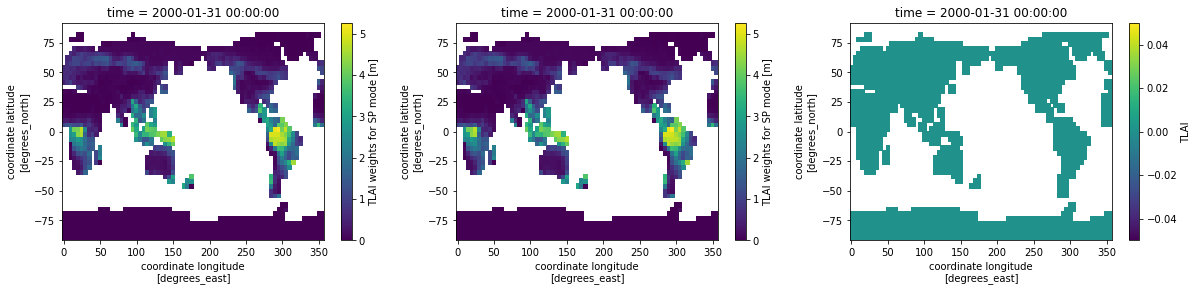

In [27]:
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_nl_rest.isel(time=tstop_idx).plot(ax=ax1)
tlai_sp_rest.isel(time=tstop_idx).plot(ax=ax2)
tlai_spnl_rest_diff.isel(time=tstop_idx).plot(ax=ax3)

### GPP

Variable diff calculations

In [28]:
gpp_sp_base = data_sp_base.GPP
gpp_sp_rest = data_sp_rest.GPP
gpp_sp_diff = gpp_sp_base - gpp_sp_rest

gpp_as_base = data_as_base.GPP
gpp_as_rest = data_as_rest.GPP
gpp_as_diff = gpp_as_base - gpp_as_rest

gpp_nl_base = data_nl_base.GPP
gpp_nl_rest = data_nl_rest.GPP
gpp_nl_diff = gpp_nl_base - gpp_nl_rest

gpp_spas_base_diff = gpp_sp_base - gpp_as_base
gpp_spas_rest_diff = gpp_sp_rest - gpp_as_rest

gpp_asnl_base_diff = gpp_as_base - gpp_nl_base
gpp_asnl_rest_diff = gpp_as_rest - gpp_nl_rest

gpp_spnl_base_diff = gpp_sp_base - gpp_nl_base
gpp_spnl_rest_diff = gpp_sp_rest - gpp_nl_rest

Plot new `all_soil_patches` loop base-rest difference.  We see very small differences primarily in single strip in the artic

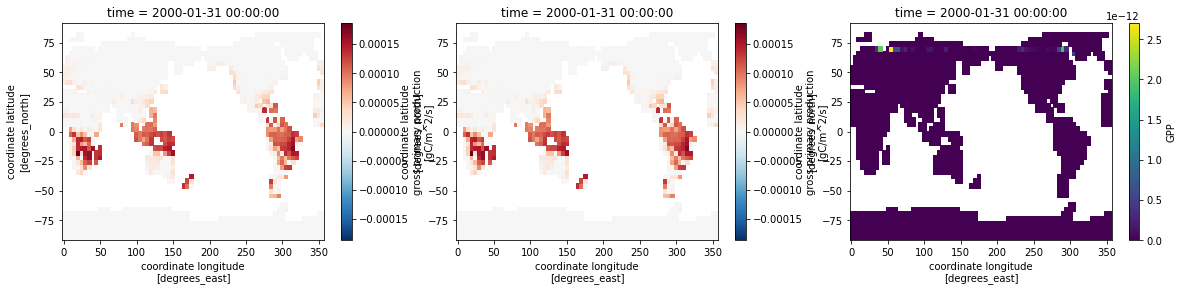

In [29]:
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
gpp_as_base.isel(time=tstop_idx).plot(ax=ax1)
gpp_as_rest.isel(time=tstop_idx).plot(ax=ax2)
gpp_as_diff.isel(time=tstop_idx).plot(ax=ax3)

Plot the variable mean longitude over time.  We see that issue persists in one latitude band over time.

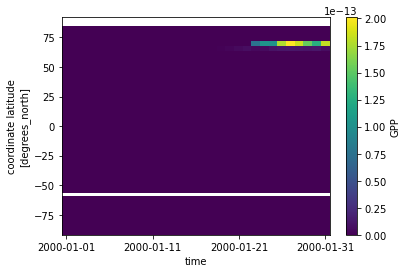

In [30]:
gpp_as_diff.mean(dim='lon').plot(x='time',y='lat')
# gpp_npl_diff.mean(dim='lat').plot(x='time',y='lon')

Plot `nolakep` loop results

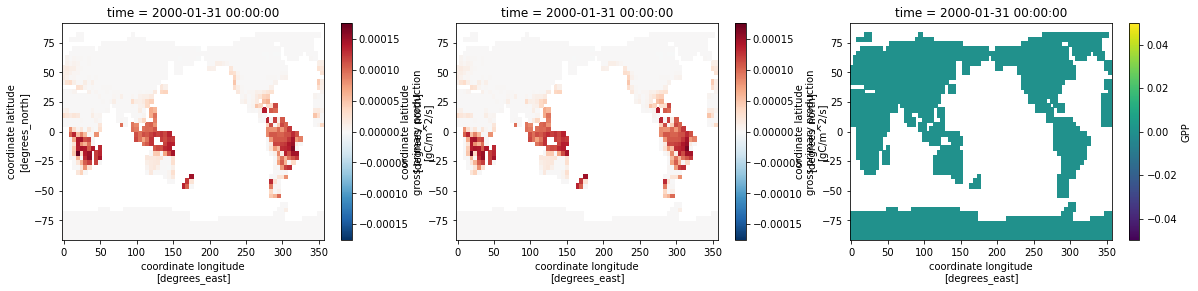

In [31]:
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
gpp_nl_base.isel(time=tstop_idx).plot(ax=ax1)
gpp_nl_rest.isel(time=tstop_idx).plot(ax=ax2)
gpp_nl_diff.isel(time=tstop_idx).plot(ax=ax3)

Compare the restarts between the `all_soil_patches` filter and the `nolakep` filter loop

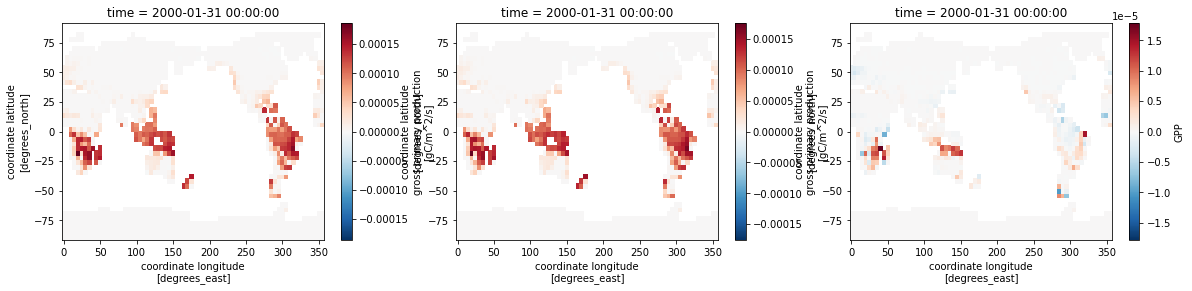

In [32]:
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
gpp_as_rest.isel(time=tstop_idx).plot(ax=ax1)
gpp_nl_rest.isel(time=tstop_idx).plot(ax=ax2)
gpp_asnl_rest_diff.isel(time=tstop_idx).plot(ax=ax3)

Compare the restarts between the `soilp` filter and the `nolakep` filter loop

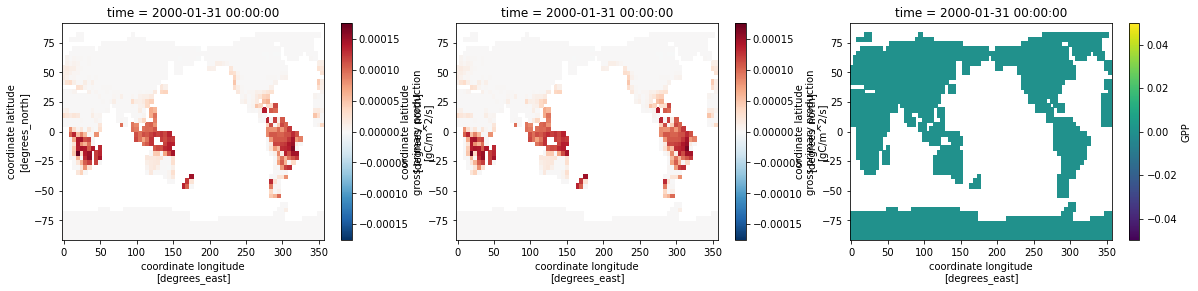

In [33]:
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
gpp_sp_rest.isel(time=tstop_idx).plot(ax=ax1)
gpp_nl_rest.isel(time=tstop_idx).plot(ax=ax2)
gpp_spnl_rest_diff.isel(time=tstop_idx).plot(ax=ax3)

Compare the restarts between the `all_soil_patches` filter and the `soilp` filter loop

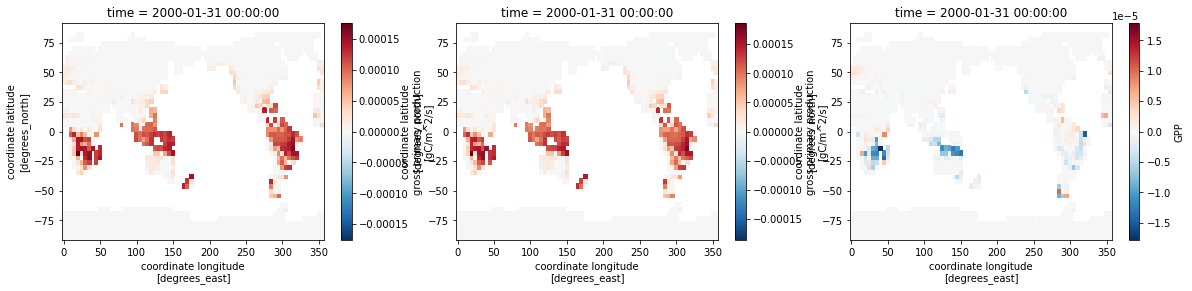

In [34]:
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
gpp_sp_rest.isel(time=tstop_idx).plot(ax=ax1)
gpp_as_rest.isel(time=tstop_idx).plot(ax=ax2)
gpp_spas_rest_diff.isel(time=tstop_idx).plot(ax=ax3)

### T_SCALAR

Variable diff calculations

In [52]:
tscal_npl_base = data_npl_base.T_SCALAR
tscal_npl_rest = data_npl_rest.T_SCALAR
tscal_npl_diff = tscal_npl_base - tscal_npl_rest

tscal_nonpl_base = data_nonpl_base.T_SCALAR
tscal_nonpl_rest = data_nonpl_rest.T_SCALAR
tscal_nonpl_diff = tscal_nonpl_base - tscal_nonpl_rest

tscal_diff = tscal_nonpl_rest - tscal_npl_rest

tscal_npl_base.dims

('time', 'levsoi', 'lat', 'lon')

Plot new `all_soil_patches` loop base-rest difference.  We see very small differences primarily in single strip in the artic

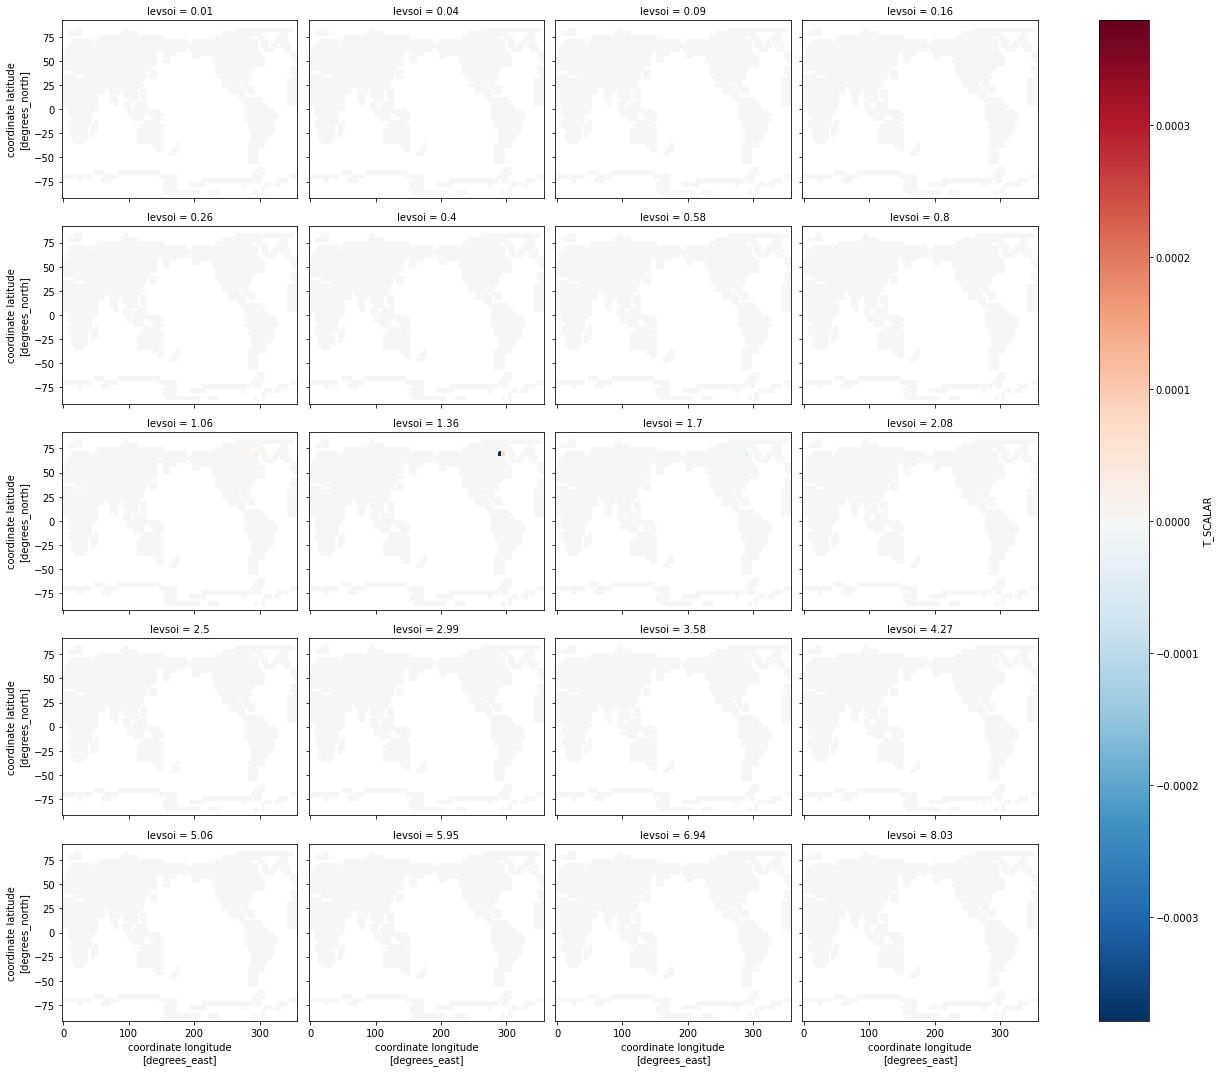

In [57]:
tscal_npl_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='levsoi',col_wrap=4,figsize=(18,15))

Plot `nolakep` loop base/rest results

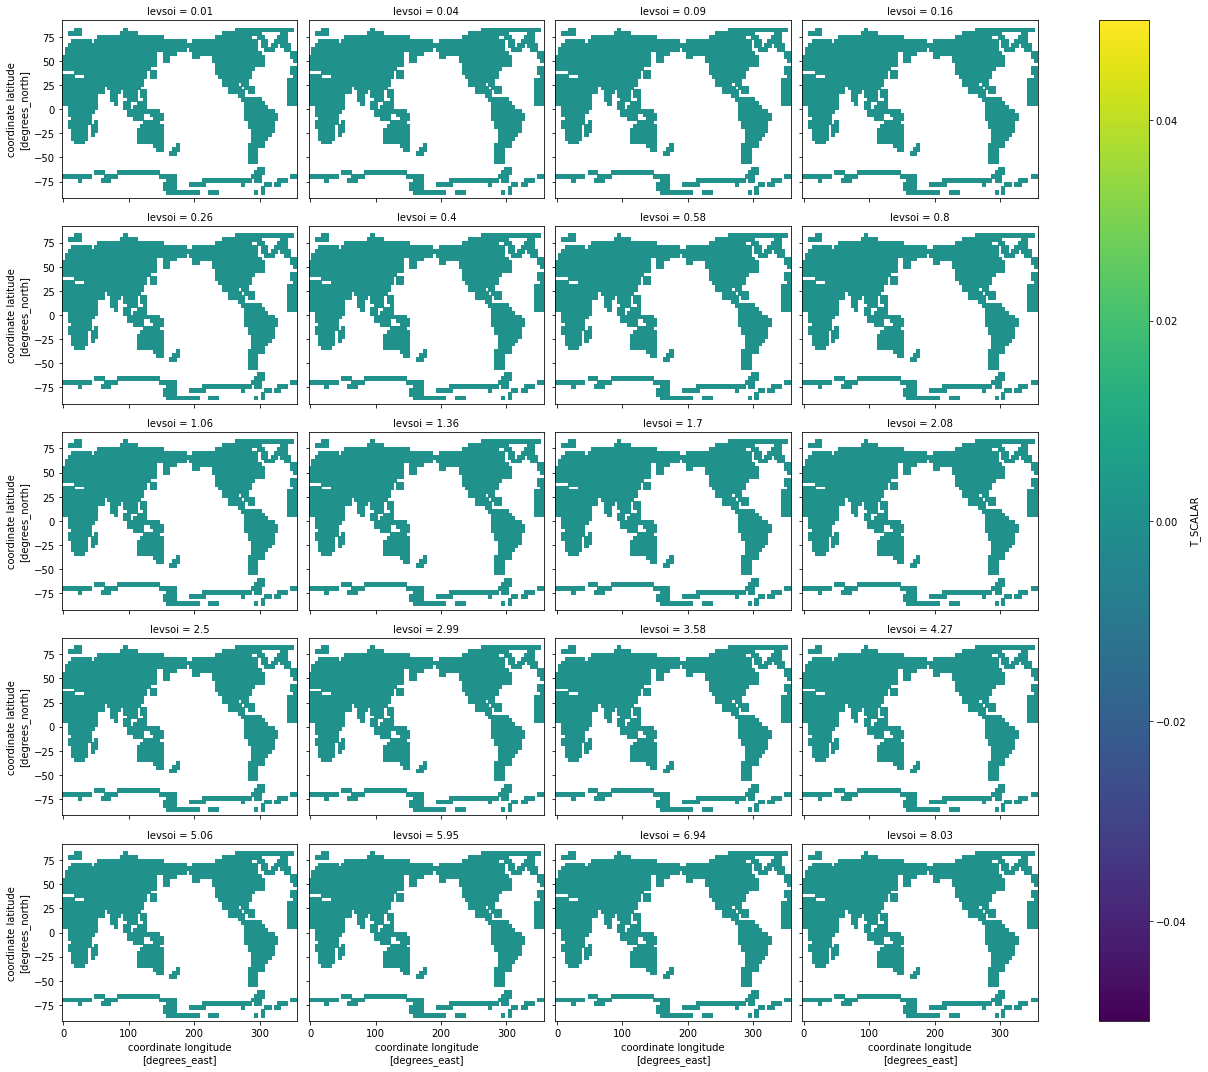

In [58]:
tscal_nonpl_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='levsoi',col_wrap=4,figsize=(18,15))

Compare the restarts between the `all_soil_patches` filter and the `nolakep` filter loop

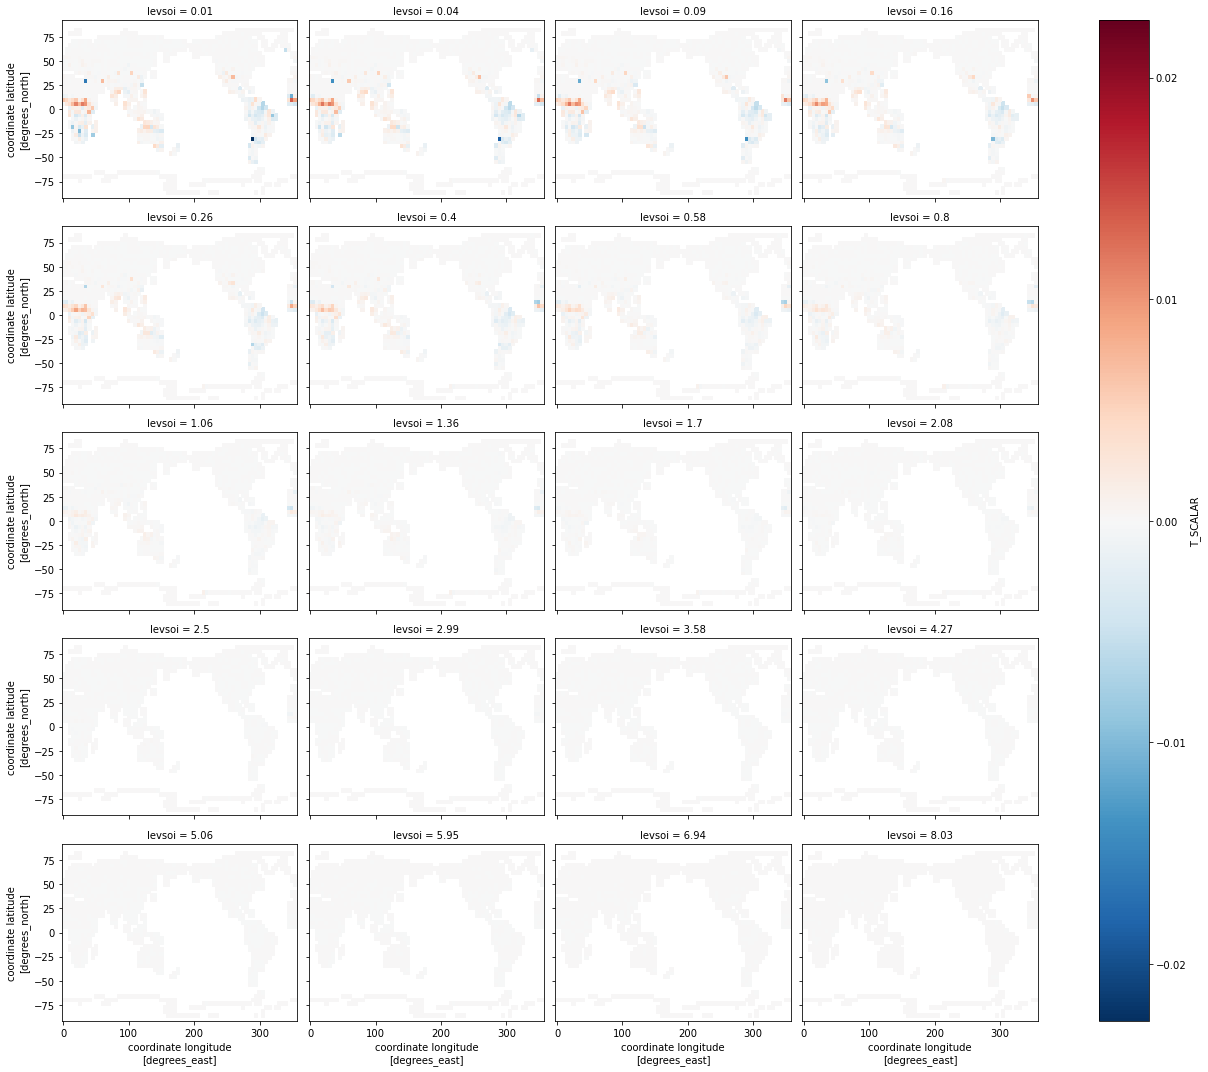

In [59]:
tscal_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='levsoi',col_wrap=4,figsize=(18,15))

### BTRAN

Variable diff calculations

In [37]:
btran_npl_base = data_npl_base.BTRAN
btran_npl_rest = data_npl_rest.BTRAN
btran_npl_diff = btran_npl_base - btran_npl_rest

btran_nonpl_base = data_nonpl_base.BTRAN
btran_nonpl_rest = data_nonpl_rest.BTRAN
btran_nonpl_diff = btran_nonpl_base - btran_nonpl_rest

btran_diff = btran_nonpl_rest - btran_npl_rest

Plot new `all_soil_patches` loop base-rest difference.  We see very small differences primarily in single strip in the artic

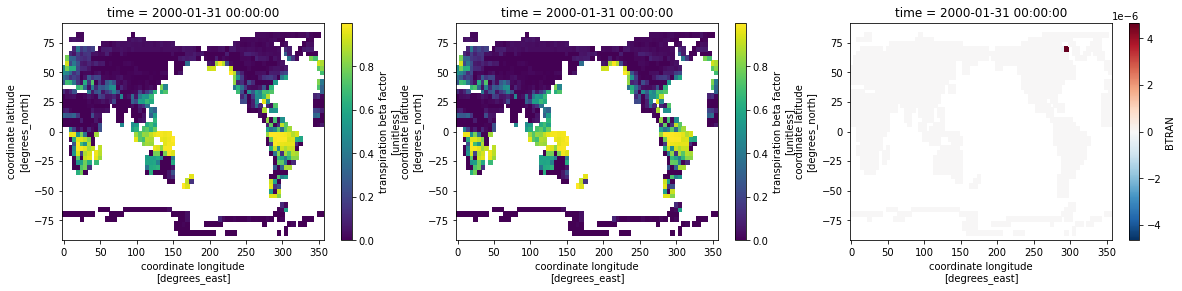

In [38]:
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
btran_npl_base.isel(time=tstop_idx).plot(ax=ax1)
btran_npl_rest.isel(time=tstop_idx).plot(ax=ax2)
btran_npl_diff.isel(time=tstop_idx).plot(ax=ax3)

Plot `nolakep` loop base/rest results

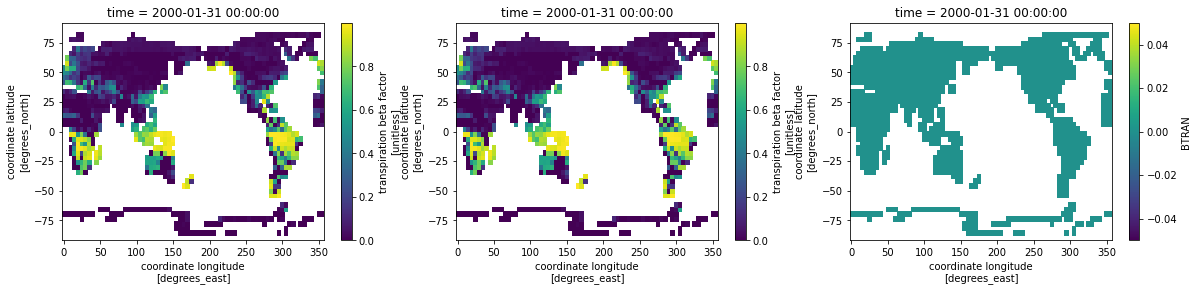

In [39]:
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
btran_nonpl_base.isel(time=tstop_idx).plot(ax=ax1)
btran_nonpl_rest.isel(time=tstop_idx).plot(ax=ax2)
btran_nonpl_diff.isel(time=tstop_idx).plot(ax=ax3)

Compare the restarts between the `all_soil_patches` filter and the `nolakep` filter loop

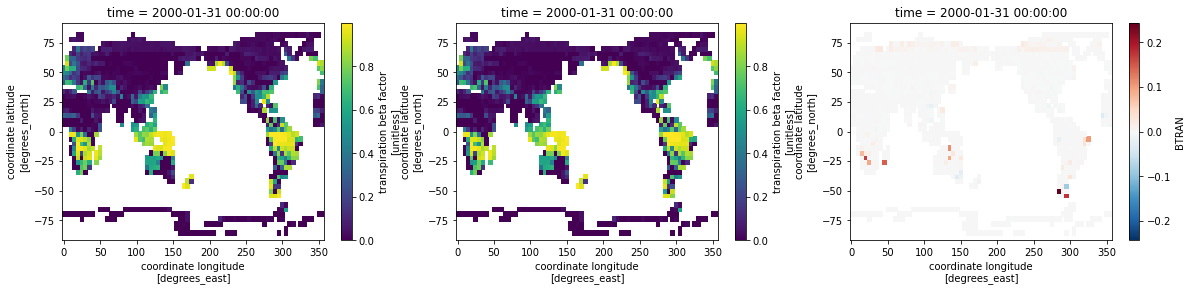

In [40]:
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
btran_nonpl_rest.isel(time=tstop_idx).plot(ax=ax1)
btran_npl_rest.isel(time=tstop_idx).plot(ax=ax2)
btran_diff.isel(time=tstop_idx).plot(ax=ax3)

### AREA_PLANT

Variable diff calculations

In [41]:
ap_npl_base = data_npl_base.AREA_PLANT
ap_npl_rest = data_npl_rest.AREA_PLANT
ap_npl_diff = ap_npl_base - ap_npl_rest

ap_nonpl_base = data_nonpl_base.AREA_PLANT
ap_nonpl_rest = data_nonpl_rest.AREA_PLANT
ap_nonpl_diff = ap_nonpl_base - ap_nonpl_rest

ap_diff = ap_nonpl_rest - ap_npl_rest

Plot new `all_soil_patches` loop base-rest difference.  We see very small differences primarily in single strip in the artic

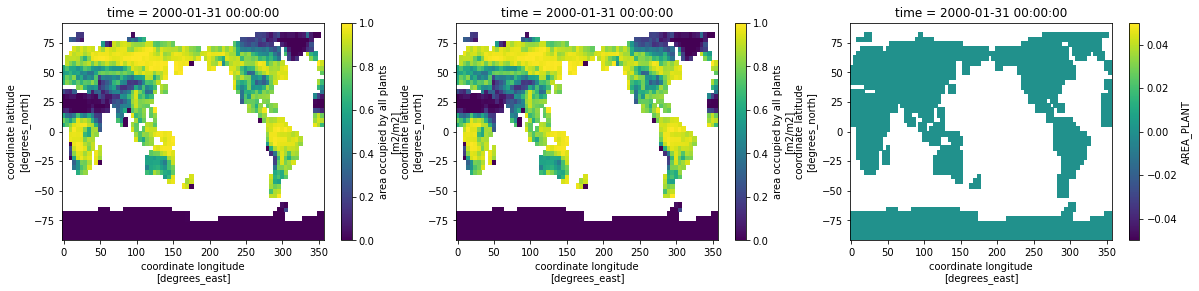

In [42]:
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
ap_npl_base.isel(time=tstop_idx).plot(ax=ax1)
ap_npl_rest.isel(time=tstop_idx).plot(ax=ax2)
ap_npl_diff.isel(time=tstop_idx).plot(ax=ax3)

Plot `nolakep` loop base/rest results

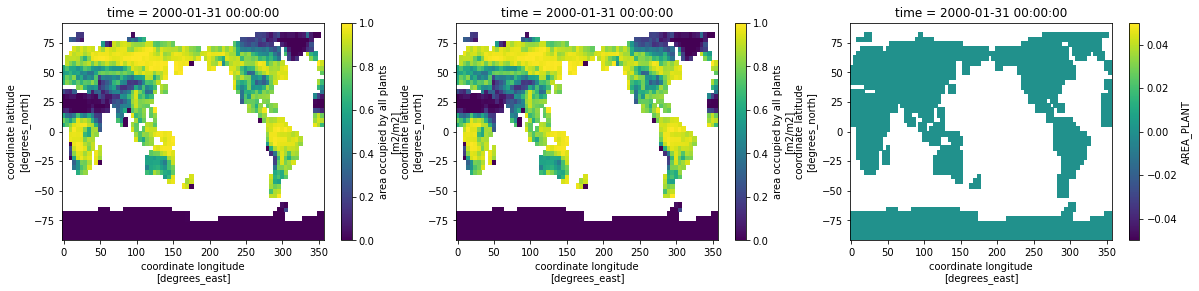

In [43]:
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
ap_nonpl_base.isel(time=tstop_idx).plot(ax=ax1)
ap_nonpl_rest.isel(time=tstop_idx).plot(ax=ax2)
ap_nonpl_diff.isel(time=tstop_idx).plot(ax=ax3)

Compare the restarts between the `all_soil_patches` filter and the `nolakep` filter loop

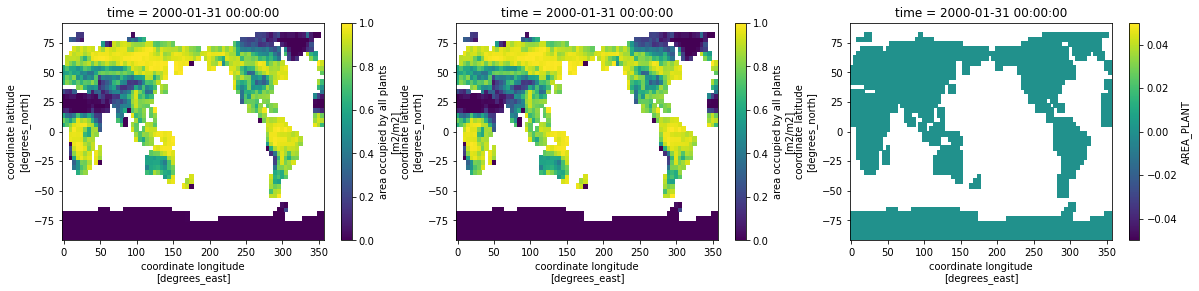

In [44]:
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
ap_nonpl_rest.isel(time=tstop_idx).plot(ax=ax1)
ap_npl_rest.isel(time=tstop_idx).plot(ax=ax2)
ap_diff.isel(time=tstop_idx).plot(ax=ax3)

### PFTbiomass

In [67]:
data_npl_base.PFTbiomass.dims

('time', 'fates_levpft', 'lat', 'lon')

In [74]:
pbm_npl_base = data_npl_base.PFTleafbiomass
pbm_npl_rest = data_npl_rest.PFTleafbiomass
pbm_npl_diff = pbm_npl_base - pbm_npl_rest

pbm_nonpl_base = data_nonpl_base.PFTleafbiomass
pbm_nonpl_rest = data_nonpl_rest.PFTleafbiomass
pbm_nonpl_diff = pbm_nonpl_base - pbm_nonpl_rest

pbm_diff = pbm_nonpl_rest - pbm_npl_rest

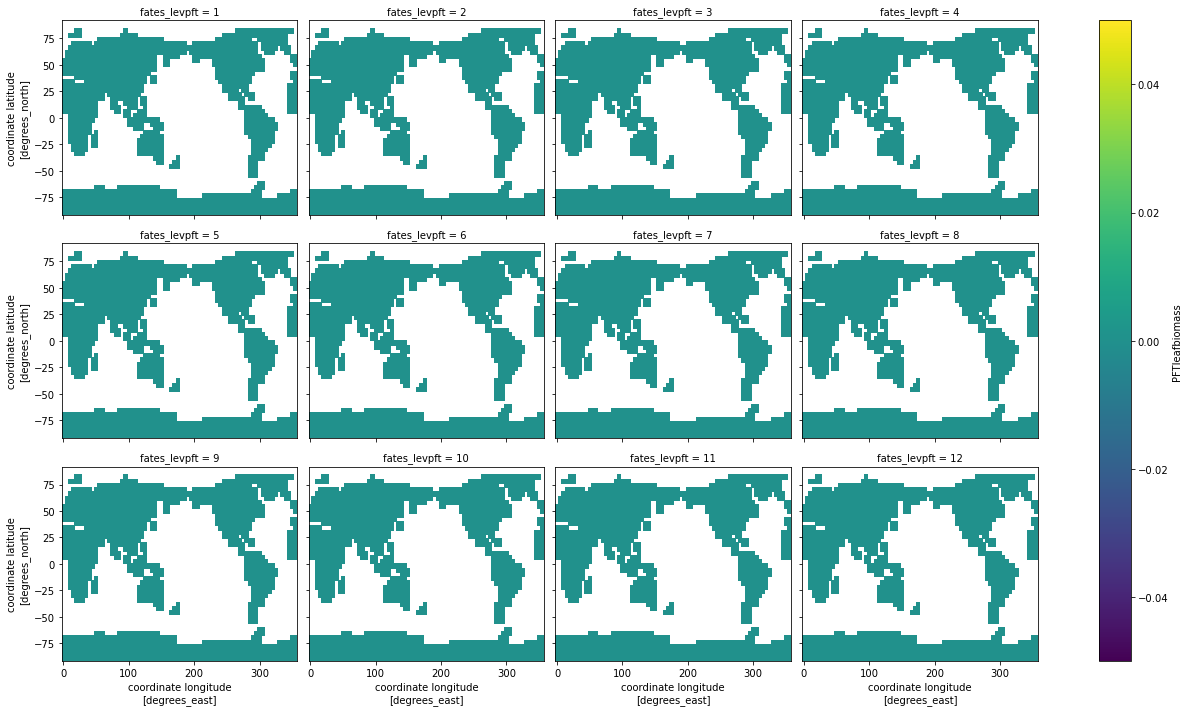

In [73]:
pbm_npl_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4, figsize=(18,10))

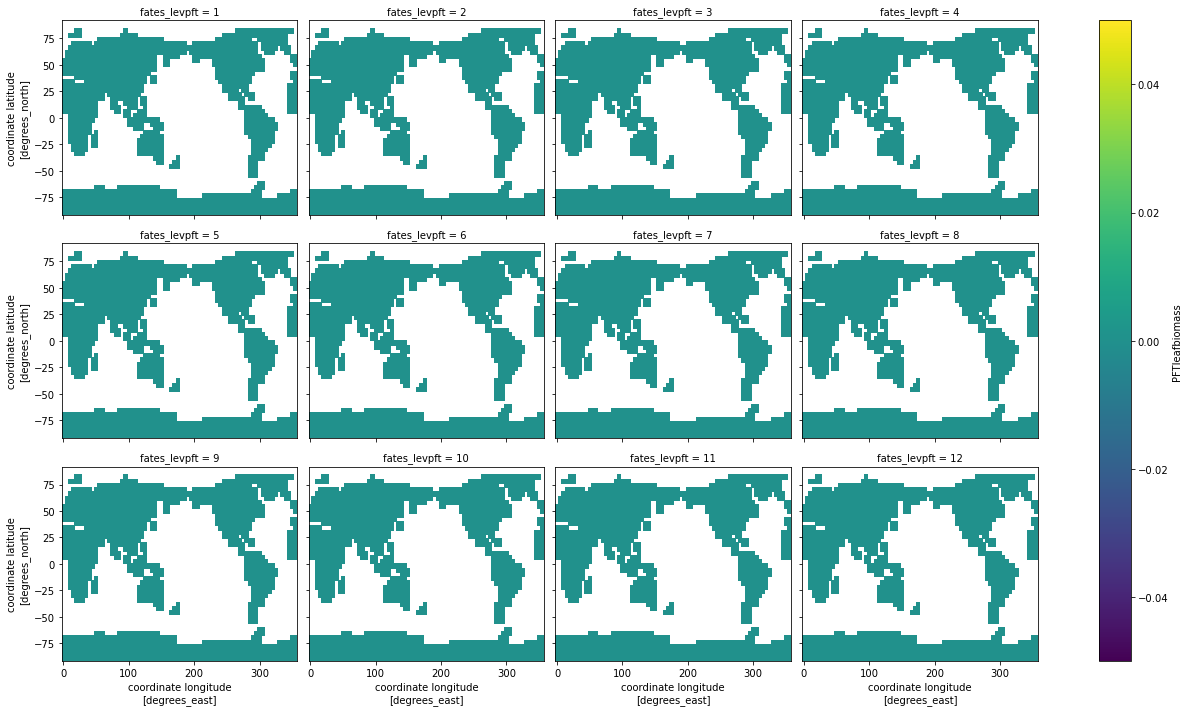

In [75]:
pbm_nonpl_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4, figsize=(18,10))

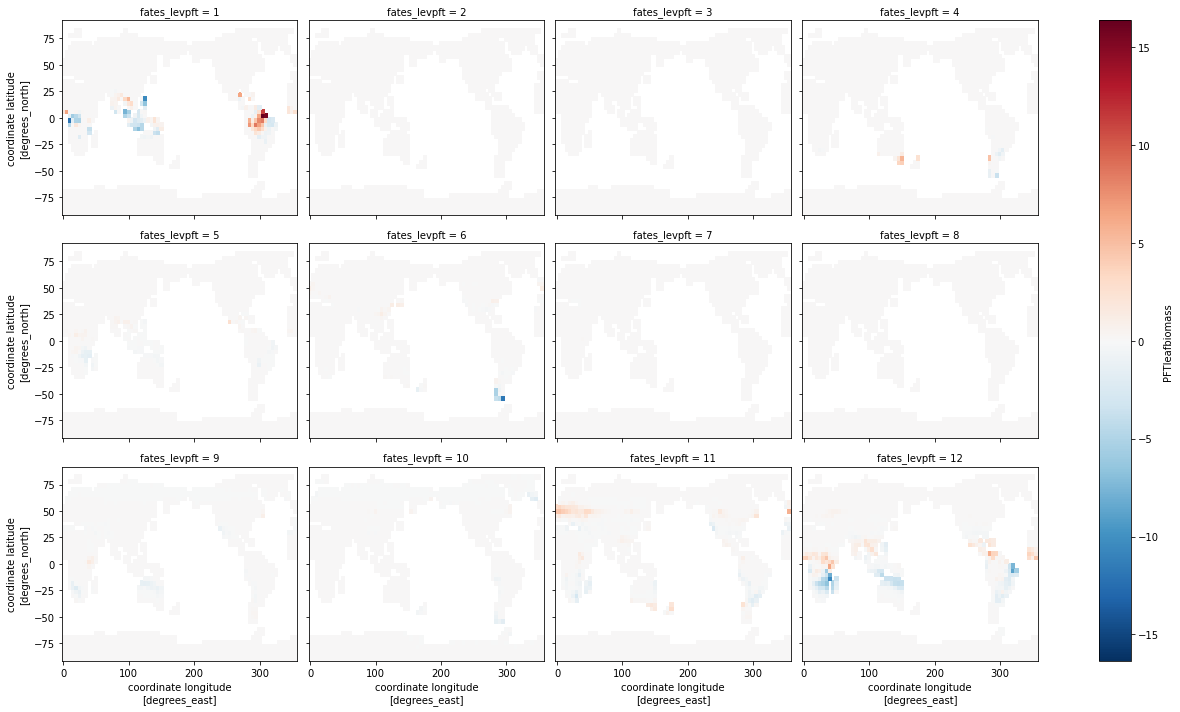

In [76]:
pbm_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4, figsize=(18,10))